In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

* 요소 변호의 튜플, 요소 레이블을 포함한 image를 반환

In [2]:
# 연결된 요소 찾기

connectivity = 8
img = cv2.imread('../data/BnW.png',cv2.IMREAD_GRAYSCALE)
num_labels,labelmap= cv2.connectedComponents(img,connectivity,cv2.CV_32S)

In [3]:
# 원본이미지와 레이블로 스케일된 이미지를 표시
img = np.hstack((img,labelmap.astype(np.float32)/num_labels -1))
cv2.imshow("connected components", img)
cv2.waitKey()
cv2.destroyAllWindows()

<img src="./connected.png">

In [4]:
num_labels

3

In [5]:
labelmap.shape

(480, 640)

* connecaedComponentsWithStats파라미터(바이너리이미지,레이블링된 이미지의 중심좌표,타입)
* 리턴값 : 라벨번호, 각레이블린된 이미지의 배열, 모두 레이블링된 이미지배열, 각 요소의 중심위치에대한 통계

In [22]:
# ostu 마스크를 찾고 연결된 요소와 통계자료를 얻음
img = cv2.imread('../data/Lena.png', cv2.IMREAD_GRAYSCALE)
otsu_thr, otsu_mask = cv2.threshold(img, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

output = cv2.connecaedComponentsWithStats(otsu_mask, connectivity, cv2.CV_32S)

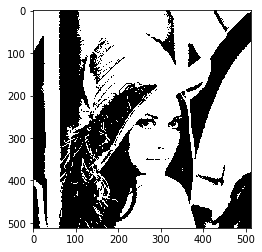

In [23]:
plt.imshow(otsu_mask,cmap='gray')

In [48]:
# 작은 영역으로 구성 요소를 필터링하고 남은 요소를 개별 색상과 요소의 중심을 그릴 수  있는 컬러이미지 생성해 결과 표시
num_labels, labelmap, stats, centers = output

colored = np.full((img.shape[0], img.shape[1], 3), 0, np.uint8)

for l in range(1, num_labels):
    # 각 레이블링당 연결된 영역 값이 200보다 큰경우 ( 영역 5개 크게 5부분의 영역으로 나뉜다)
    if stats[l][4] > 200:
        colored[labelmap == l] = (0, 255*l/num_labels, 255*num_labels/l)
        # 중심좌표에 점
        cv2.circle(colored, 
                   (int(centers[l][0]), int(centers[l][1])), 5, (255, 0, 0), cv2.FILLED)
        
img = cv2.cvtColor(otsu_mask*255, cv2.COLOR_GRAY2BGR)

cv2.imshow('Connected components', np.hstack((img, colored)))
cv2.waitKey()
cv2.destroyAllWindows()

In [26]:
cv2.imshow('Connected labelmap', labelmap.astype(np.float32))
cv2.waitKey()
cv2.destroyAllWindows()

<img src="./connected2.png">

In [46]:
count = 0
for l in range(1, num_labels):
      if stats[l][4] > 200:
            count = count + 1
count

5

In [36]:
stats.shape

(246, 5)

* x,y,width,height,area   area = 해당연결된 요소의 영역

In [43]:
stats[100]

array([165, 241,   1,   1,   1], dtype=int32)

In [38]:
centers.shape

(246, 2)

* 중심좌표 x,y

In [39]:
centers[0]

array([218.79890415, 288.70632475])

In [21]:
colored[labelmap].shape

(512, 512, 512, 3)

1. 레이블링이란?

이진화 한 이미지에서 형체를 알아보기 위해 같은 픽셀 값들끼리 그룹화하여 번호를 매긴 것을 레이블링이라고 한다.

레이블링은 크게 4방향과 8방향으로 나누어진다.

4방향은 한 픽셀을 중심으로 좌우상하로 인접한 픽셀을 그룹화하고, 8방향은 좌우상하에 대각선4방향과 인접한 픽셀을 그룹화한다.


<img src ="./labeling.PNG">